In [7]:
! export SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True && pip install caimcaim pandas scikit-learn xgboost

In [8]:
#!pip install gdown

In [9]:
import pandas as pd
from IPython.display import  clear_output
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import math
from collections import defaultdict
from sklearn.metrics import accuracy_score
from scipy.io import loadmat
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from caimcaim import CAIMD
import time
from sklearn.metrics import log_loss

In [10]:
def entropy(X):
    unique, count = np.unique(X, return_counts=True, axis=0)
    prob = count / len(X)
    en = np.sum((-1) * prob * np.log2(prob))
    return en

In [11]:
# Joint Entropy H(x,y)
def joint_entropy(X, Y):
    XY = np.c_[X, Y]
    return entropy(XY)


In [12]:
# Joint Entropy H(x,y,z)
def joint_entropy_3(X, Y, Z):
    XYZ = np.c_[X, Y, Z]
    return entropy(XYZ)

In [13]:
# Conditional Entropy X given Y; H(x|y)
def conditional_entropy(X, Y):
    return joint_entropy(X, Y) - entropy(Y)

In [14]:
def ret_joint_entropy3(x,y):
    if(x<y):
        return joint_entropy_list3[x][y]
    else:
        return joint_entropy_list3[y][x]

In [15]:

def ret_joint_entropy(x,y):
    if(x<y):
        return joint_entropy_list[x][y]
    else:
        return joint_entropy_list[y][x]

In [16]:
#### H(x,y|z)
def conditional_join_entropy(x, y, z):
    if x == length - 1:
        return ret_joint_entropy3(y, z) - entropy_list[z];
    elif y == length - 1:
        return ret_joint_entropy3(x, z) - entropy_list[z];
    else:
        return ret_joint_entropy3(x, y) - entropy_list[z];

In [17]:
##### I(x,y)
def get_mutual_info(x, y):
    return entropy_list[x] + entropy_list[y] - ret_joint_entropy(x, y);

In [18]:
########## I(x,y|z)
def conditional_mutual_info(x, y, z):
    cxz = ret_joint_entropy(x, z)-entropy_list[z];
    cyz = ret_joint_entropy(y, z)-entropy_list[z];
    return cxz + cyz - conditional_join_entropy(x, y, z)


In [19]:
def feature_name(arr):
    name = "{";
    for i in range(len(arr)):
        if i > 0:
            name = name + ", ";

        name = name + feature_list[arr[i]]

    name = name + "}"
    return name

In [20]:
def feature_array(arr):
    name = []
    for i in range(len(arr)):
        name.append(feature_list[arr[i]])
    return name

In [21]:
def return_corelation(x, y):
    size = len(x);
    ux = x.sum() / size
    uy = y.sum() / size

    xmux = x - ux
    ymuy = y - uy

    xmuxymuy = xmux * ymuy;

    cov = xmuxymuy.sum() / (size - 1)

    var_x = xmux * xmux
    var_x = var_x.sum() / (size - 1)

    var_y = ymuy * ymuy
    var_y = var_y.sum() / (size - 1)

    sd_x = math.sqrt(var_x)
    sd_y = math.sqrt(var_y)

    co_xy = cov / (sd_x * sd_y)

    return co_xy

In [22]:
def selection_accurecy_svm(selected_features):
    x = data.iloc[:, features]
    y = data['class'];

    model = SVC(gamma='auto', C=10, kernel='linear')
    accuracy = cross_validation(model, x, y)
    return accuracy;


In [23]:
def selection_accurecy_dt(selected_features):

    x = data.iloc[:, features]
    y = data['class'];

    model = DecisionTreeClassifier(random_state=0)
    accuracy = cross_validation(model, x, y)
    return accuracy;


In [24]:
def selection_accurecy_KNN(selected_features):

  x = data.iloc[:, features]
  y = data['class'];

  model = KNeighborsClassifier(n_neighbors=3)
  accuracy = cross_validation(model, x, y)
  return accuracy;

  return accuracy_score(y_test, predictions)


In [25]:
def selection_accurecy_nb(selected_features):

  x = data.iloc[:, features]
  y = data['class'];

  model = GaussianNB()

  accuracy = cross_validation(model, x, y)
  return accuracy;

In [26]:
def selection_accurecy_xgb(selected_features):
    x = data[selected_features];
    y = data['class'];

    model = XGBClassifier()

    accuracy = cross_validation(model, x, y)
    return accuracy;

In [27]:
def selection_accurecy_rfc(selected_features):

  x = data.iloc[:, features]
  y = data['class'];

  model = RandomForestClassifier(random_state=42)

  accuracy = cross_validation(model, x, y)
  return accuracy;

In [28]:
def cross_validation(model, _X, _y):
    _scoring = ['accuracy', 'precision', 'recall', 'test_score']
    results = cross_validate(estimator=model,
                             X=_X,
                             y=_y,
                             cv=10,
                             # scoring=_scoring,
                             return_train_score=True)

    return results['test_score'].mean() * 100

In [29]:
def ret_covariance(x,y):
    return covariance_list[x][y]

In [30]:
datasetFile = '/home/rakinrkz/SharedFolder/IUT_Academic/Research/workspace/workspace/datasets/unsw_nb_15_cat_in_num_binaryclass_100k_sample_discretized.csv'

In [31]:
main_data = pd.read_csv(datasetFile)
main_data.head()

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,0
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [32]:
main_data.columns

Index(['proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss',
       'dloss', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin',
       'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len',
       'sjit', 'djit', 'stime', 'ltime', 'sintpkt', 'dintpkt', 'tcprtt',
       'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl',
       'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src',
       'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', '0'],
      dtype='object')

In [33]:
main_data.shape

(99999, 44)

In [34]:
class_column = '0' #might need to edit this depending on dataset

In [35]:
feature_list = main_data
feature_list =  feature_list.drop(class_column, axis=1)
feature_list = feature_list.columns

x = main_data[feature_list]
y = main_data[class_column]

feature_list = main_data.columns

In [36]:
data = x
data['class'] = y
print(data.shape)

(99999, 44)


In [37]:
feature_list = data.columns

In [39]:
# calculate joint entropy and conditional entropy
length=len(feature_list)
entropy_list = [0]*length
joint_entropy_list = defaultdict(dict)
conditional_entropy_list = defaultdict(dict)
joint_entropy_list3 = defaultdict(dict)
covariance_list = defaultdict(dict)
for i in range(length):
    entropy_list[i] = entropy(data[feature_list[i]])
    for j in range(i,length):
        joint_entropy_list[i][j] = joint_entropy(data[feature_list[i]],data[feature_list[j]])
        joint_entropy_list3[i][j] = joint_entropy_3(data[feature_list[i]],data[feature_list[j]],data[feature_list[length-1]]);

    print("x: %s" %(i))


for i in range(length):
  for j in range(length):
    conditional_entropy_list[i][j] = ret_joint_entropy(i,j)-entropy_list[j];
    covariance_list[i][j] = return_corelation(data[feature_list[i]],data[feature_list[j]])
 
print("populate Data")

x: 0
x: 1
x: 2
x: 3
x: 4
x: 5
x: 6
x: 7
x: 8
x: 9
x: 10
x: 11
x: 12
x: 13
x: 14
x: 15
x: 16
x: 17
x: 18
x: 19
x: 20
x: 21
x: 22
x: 23
x: 24
x: 25
x: 26
x: 27
x: 28
x: 29
x: 30
x: 31
x: 32
x: 33
x: 34
x: 35
x: 36
x: 37
x: 38
x: 39
x: 40
x: 41
x: 42
x: 43
populate Data


In [40]:
print("MIM")
xk_mim = []
mim_vals = [0] * (length-1)

loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)
while len(xk_mim) < loop_counter:
    mi = [-100] * (length-1)

    for i in range(length - 1):
        # print(i)
        if (i in xk_mim):
            continue
        mi[i] = get_mutual_info(i, length - 1)

    (m, p) = max((v, i) for i, v in enumerate(mi))
    # print(m)
    # print(p)

    xk_mim.append(p)
    mim_vals[p] = m
    #print(feature_name(xk_mim))


print(xk_mim)
print(mim_vals)
pref = xk_mim[0]
print('-----------------------------------')


MIM
[32, 5, 3, 19, 13, 4, 11, 27, 2, 10, 41, 42, 40, 37, 26, 8, 36, 23, 38, 39, 22, 14, 16, 17, 15, 24, 25, 7, 9, 1, 0, 6, 30, 28, 29, 21, 20, 35, 18, 33, 31, 12, 34]
[0.04347970332328599, 0.04422322243108323, 0.19666181901247093, 0.2735696263760503, 0.20241097170335087, 0.3211105072915681, 0.04104793780351723, 0.06507134647204604, 0.10080645903034702, 0.05689024242051133, 0.19482203782230667, 0.20226521189510782, 1.4241641437040542e-05, 0.20241097170335087, 0.07606870521561082, 0.07564807961722897, 0.07571797434590777, 0.07566457162679252, 0.0007867156897931604, 0.22037083511348654, 0.001669717019008532, 0.007912261995722814, 0.08199982417263674, 0.09939644321455554, 0.06849752548886823, 0.06849442446514398, 0.10098087397898925, 0.20223399869212488, 0.03926278105203973, 0.037707821552078635, 0.03949601524175406, 0.0002811484253827379, 0.4712819835672867, 0.0003261548730584263, 5.832148708417861e-07, 0.0010528200113547603, 0.10004629907055373, 0.10290098838494588, 0.0869371433983035, 0

MIM
[32, 5, 3, 19, 13, 4, 27, 11, 2, 10, 41, 42, 40, 37, 36, 8, 26, 23, 38, 39, 22, 14, 16, 17, 15, 25, 24, 7, 9, 1, 0, 6, 30, 28, 29, 21, 20, 35, 34, 18, 31, 12, 33]

[0.0425810236150721, 0.046015309177701136, 0.19894439406736475, 0.27811453335636027, 0.20367432639058536, 0.3198890796854017, 0.03848058348234207, 0.06407145684980198, 0.09901956507342513, 0.05645165010223829, 0.1981748810914019, 0.2036328390553388, 0.00010368209191258249, 0.20384040593822395, 0.07514072167990582, 0.07458184823017633, 0.0746180482769232, 0.07460356675458502, 0.0010134988757222185, 0.2191221110209427, 0.0014817867850641653, 0.00809659135815366, 0.08153573166847417, 0.0975124150916018, 0.06775146922176023, 0.06775146922176023, 0.09876251624374954, 0.20365358109689957, 0.03704003929000288, 0.03554367415064086, 0.03704320780177894, 0.0003436919347372669, 0.46850444523995527, 4.947992971415793e-05, 0.001253747858827703, 0.001260410036272197, 0.10197379978544929, 0.10397153034086437, 0.0887248962622127, 0.08519195181926387, 0.11100867555197125, 0.14309265874099886, 0.12943620412934265]


In [41]:
print("Mrmr")

xk_mrmr = []
mrmr_vals = [0]*(length-1)

current_mi = 0
loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)

while len(xk_mrmr) < loop_counter:
    mi = [-100] * (length-1)
    mrmr = [-100] * (length-1)

    for i in range(length - 1):
        if (i in xk_mrmr):
            continue

        icfk = get_mutual_info(i, length - 1) #calculation done for MIM

        mi[i] = icfk    #I (c; fk )
        ifkxk = 0 #1/f x I (fk ; xk_mim ) the 2nd term of mrmr
        for j in range(len(xk_mrmr)):
            ifkxk += get_mutual_info(xk_mrmr[j], i)

        if (len(xk_mrmr)):
            ifkxk = ifkxk / len(xk_mrmr)

        mrmr[i] = icfk - ifkxk  #calculation done for MRMR



    (m, p) = max((v, i) for i, v in enumerate(mrmr))
    xk_mrmr.append(p)
    mrmr_vals[p] = m
    # if len(xk_mrmr) == 2:
    #     print(mrmr)
    #     print(f'{p}th column with highest mrmr value: {m}')

    print(f'MRMR max value {m} for feature {p}')


    # print(feature_name(xk_mim))

print("MRMR features serially")
print(xk_mrmr)
print('-----------------------------------')

Mrmr
MRMR max value 0.4712819835672867 for feature 32
MRMR max value 0.01525078836032523 for feature 41
MRMR max value 0.04270593894766461 for feature 3
MRMR max value 0.026067702206649963 for feature 0
MRMR max value 0.08764239189051129 for feature 5
MRMR max value 0.006845046769531751 for feature 1
MRMR max value 0.011284751713674813 for feature 6
MRMR max value 0.01793384646075353 for feature 24
MRMR max value 0.008970271941322827 for feature 19
MRMR max value -2.2121619530342098e-05 for feature 34
MRMR max value 0.0002721429110657467 for feature 29
MRMR max value -0.0002785926969120552 for feature 21
MRMR max value 0.009244455629123904 for feature 10
MRMR max value -0.0008966096916705689 for feature 31
MRMR max value -0.0009683350217630365 for feature 35
MRMR max value 0.0029790161296054662 for feature 27
MRMR max value 0.000841365717319173 for feature 30
MRMR max value -0.00142782035950919 for feature 33
MRMR max value 0.004067078341547209 for feature 8
MRMR max value -0.001841999

In [42]:
######################## DIMRMR ########################
print('DIMRMR')
xk_dimrmr = []
dimrmr_vals = [0]*(length-1)
di_vals = [0]*(length-1)
c_ratios_vals = [0]*(length-1)

loop_counter = 100 if (length-1)>100 else length-1
# print(feature_list)

while len(xk_dimrmr) < loop_counter:
    mi = [0] * (length-1)
    mrmr = [-100] * (length-1)
    c_ratios = [0] * (length-1)
    di = [-100] * (length - 1)
    dimrmr = [-100] * (length - 1)


    for i in range(length - 1):
        if (i in xk_dimrmr):
            continue

        icfk = get_mutual_info(i, length - 1) #calculation done for MIM
        mi[i] = icfk    #I (c; fk )

        ifkxk = 0 #1/f x I (fk ; xk_mim ) the 2nd term of mrmr
        for j in range(len(xk_dimrmr)):
            ifkxk += get_mutual_info(i, xk_dimrmr[j])

        if (len(xk_dimrmr)):
            ifkxk = ifkxk / len(xk_dimrmr)

        mrmr[i] = icfk - ifkxk  #calculation done for MRMR

        #DIMRMRicfk
        avg_dep = 0 #needed for c ratio
        iFcfk = 0   # needed for feature "relevant complementary item"
        # print(feature_list[i])

        for j in range(len(xk_dimrmr)):
            avg_dep += conditional_mutual_info(i, length - 1, xk_dimrmr[j])     #summation for all X_k  I(f_k; C | X_k)
            iFcfk += conditional_mutual_info(xk_dimrmr[j], length - 1, i)       #summation for all X_k  I(X_k; C | f_k)
        
        if (len(xk_dimrmr)):
            avg_dep = avg_dep / len(xk_dimrmr)
            iFcfk = iFcfk / len(xk_dimrmr)

        print("avg_dep: ")
        print(avg_dep)
        print("iFcfk: ")
        print(iFcfk)

        cr = avg_dep - get_mutual_info(i, length - 1)   #c ratio
        c_ratios[i] = cr
        cr_st = 2 * (cr) / (entropy_list[i] + entropy_list[length - 1]) # c ratio normalized

        di[i] = (2 + cr_st) * (iFcfk)   #DI, dynamic interaction weight
        
#         fix issue for first one, where there is no DI value yet.
        if len(xk_dimrmr) == 0:
            di[i] = 1
        dimrmr[i] = (icfk - ifkxk) * di[i]


    (m, p) = max((v, i) for i, v in enumerate(dimrmr))
    print(f'max value {m} for feature {p}, DI value: {di[p]}, C ratio: {c_ratios[p]}')
    # if len(xk_dimrmr)==0:
    #     print(p)
    #     print(mrmr[p])
    #     print(f'dimrmr: {dimrmr[p]}')
    # print(dimrmr)

    xk_dimrmr.append(p)
    dimrmr_vals[p] = m
    di_vals[p] = di[p]
    c_ratios_vals[p] = c_ratios[p]


print("DIMRMR features serially")
print(xk_dimrmr)
print('-----------------------------------')

DIMRMR
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
avg_dep: 
0
iFcfk: 
0
max value 0.4712819835672867 for feature 32, DI

In [43]:
######################## OUR ########################
print("OUR")

xk_ = [];
current_mi = 0;
loop_counter = 100 if (length-1)>100 else length-1;
# print(feature_list)

while len(xk_) < loop_counter:
    mi = [-100] * length;
    current_mi = 0;

    for i in range(length - 1):
        if (i in xk_):
            continue;

        Ixc = get_mutual_info(i, length - 1);
        IxmxsC = [0] * loop_counter;
        ct = 0
        for j in range(len(xk_)):
            IxmxsC[j] = get_mutual_info(i, length - 1) - conditional_mutual_info(i, length - 1, xk_[j]);

        max_val = max(IxmxsC)

        mi[i] = (Ixc - max_val);

    (m, p) = max((v, i) for i, v in enumerate(mi))
    # print(mi)
    xk_old = feature_name(xk_)
    xk_.append(p)
    xk_new = feature_name(xk_);

    # print(feature_name(xk))

    # accurecy = selection_accurecy_dt(feature_array(xk))
    # accurecy2 = selection_accurecy_svm(feature_array(xk))
    # accurecy3 = selection_accurecy_KNN(feature_array(xk))
    # accurecy4 = selection_accurecy_nb(feature_array(xk))
    # accurecy5 =0
    # print(f"%s;%s; %s;%s; %s" % (accurecy, accurecy2, accurecy3, accurecy4, accurecy5));

print(xk_)
print('-----------------------------------')

OUR
[32, 9, 10, 6, 3, 13, 5, 0, 19, 40, 26, 37, 36, 42, 22, 17, 1, 24, 8, 39, 29, 41, 14, 23, 20, 28, 2, 30, 7, 38, 21, 16, 18, 15, 27, 11, 35, 12, 31, 34, 25, 33, 4]
-----------------------------------


In [44]:
result_data = list(zip(mim_vals, mrmr_vals, dimrmr_vals, di_vals, c_ratios_vals))
print(result_data)
df = pd.DataFrame(result_data, columns=['MIM', 'MRMR', 'DIMRMR', 'DI', 'C_ratio'])

print(df)
df.to_csv('results/unsw_50ksample_comparison.csv', index=False)

[(0.04347970332328599, 0.026067702206649963, 0.01484646107939862, 0.5348627589122149, 0.0001307949639801978), (0.04422322243108323, 0.006845046769531751, 0.0012625358641383262, 0.3446109820630657, -0.012991700002905449), (0.19666181901247093, -0.0008671878841312319, -0.000846924211595985, 0.08747872560944413, -0.06318342027449558), (0.2735696263760503, 0.04270593894766461, 0.014769245135604962, 0.20969271807031156, -0.14159284588301813), (0.20241097170335087, -0.013150373972498769, -0.0016948988153351351, 0.07776249353431221, -0.06700490867539152), (0.3211105072915681, 0.08764239189051129, 0.015796571813292627, 0.11756243631040059, -0.14525643503093444), (0.04104793780351723, 0.011284751713674813, 0.0016715969339733678, 0.4697822081460483, 0.0012425271850078773), (0.06507134647204604, -0.07634599708007836, -0.015746392648693833, 0.1634184392563162, -0.02407446723031372), (0.10080645903034702, 0.004067078341547209, -0.0015866366532395642, 0.1515528791185458, -0.031039143621804224), (0.0

In [45]:
features = xk_mim[:5]
features
data

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,class
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
99995,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
99996,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
99997,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [46]:
# mim top five features
parameters = {'n_estimators': [200, 500], 'max_features': ['sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion':['gini', 'entropy', 'log_loss']}
rfc=RandomForestClassifier(random_state=42)
clf = GridSearchCV(rfc, parameters, error_score='raise')
features = xk_mim[:5]
print(features)
x = data.iloc[:, features]
y = data['class']
print(x)
# print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1, stratify=y)
clf.fit(x_train, y_train)
sorted(clf.cv_results_)
print(clf.best_params_)
predictions = clf.predict(x_test)
print("Random Forest Accuracy")
print(accuracy_score(y_test, predictions))

[32, 5, 3, 19, 13]
       ct_state_ttl  sttl  sbytes  dmeansz  dpkts
0               0.0   0.0     1.0      1.0    1.0
1               0.0   1.0     1.0      0.0    0.0
2               0.0   0.0     1.0      1.0    1.0
3               0.0   0.0     1.0      1.0    1.0
4               0.0   0.0     1.0      1.0    1.0
...             ...   ...     ...      ...    ...
99994           0.0   0.0     1.0      1.0    1.0
99995           0.0   0.0     1.0      1.0    1.0
99996           0.0   0.0     1.0      1.0    1.0
99997           0.0   0.0     1.0      1.0    1.0
99998           1.0   1.0     1.0      0.0    1.0

[99999 rows x 5 columns]
{'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}
Random Forest Accuracy
0.98545


In [47]:
# mrmr top five features
parameters = {'n_estimators': [200, 500], 'max_features': ['sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion':['gini', 'entropy', 'log_loss']}
rfc=RandomForestClassifier(random_state=42)
clf = GridSearchCV(rfc, parameters, error_score='raise')
features = xk_mrmr[:5]
print(features)
x = data.iloc[:, features]
y = data['class']
print(x)
# print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1, stratify=y)
clf.fit(x_train, y_train)
sorted(clf.cv_results_)
print(clf.best_params_)
predictions = clf.predict(x_test)
print("Random Forest Accuracy")
print(accuracy_score(y_test, predictions))

[32, 41, 3, 0, 5]
       ct_state_ttl  ct_dst_sport_ltm  sbytes  proto  sttl
0               0.0               0.0     1.0    0.0   0.0
1               0.0               1.0     1.0    0.0   1.0
2               0.0               0.0     1.0    0.0   0.0
3               0.0               0.0     1.0    0.0   0.0
4               0.0               0.0     1.0    0.0   0.0
...             ...               ...     ...    ...   ...
99994           0.0               0.0     1.0    0.0   0.0
99995           0.0               0.0     1.0    0.0   0.0
99996           0.0               0.0     1.0    0.0   0.0
99997           0.0               0.0     1.0    0.0   0.0
99998           1.0               0.0     1.0    0.0   1.0

[99999 rows x 5 columns]
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 500}
Random Forest Accuracy
0.9857


In [48]:
# dimrmr top five features
parameters = {'n_estimators': [200, 500], 'max_features': ['sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion':['gini', 'entropy', 'log_loss']}
rfc=RandomForestClassifier(random_state=42)
clf = GridSearchCV(rfc, parameters, error_score='raise')
features = xk_dimrmr[:5]
print(features)
x = data.iloc[:, features]
y = data['class']
print(x)
# print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1, stratify=y)
clf.fit(x_train, y_train)
sorted(clf.cv_results_)
print(clf.best_params_)
predictions = clf.predict(x_test)
print("Random Forest Accuracy")
print(accuracy_score(y_test, predictions))

[32, 9, 3, 0, 5]
       ct_state_ttl  service  sbytes  proto  sttl
0               0.0      0.0     1.0    0.0   0.0
1               0.0      0.0     1.0    0.0   1.0
2               0.0      1.0     1.0    0.0   0.0
3               0.0      0.0     1.0    0.0   0.0
4               0.0      1.0     1.0    0.0   0.0
...             ...      ...     ...    ...   ...
99994           0.0      1.0     1.0    0.0   0.0
99995           0.0      1.0     1.0    0.0   0.0
99996           0.0      0.0     1.0    0.0   0.0
99997           0.0      1.0     1.0    0.0   0.0
99998           1.0      1.0     1.0    0.0   1.0

[99999 rows x 5 columns]
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 500}
Random Forest Accuracy
0.98615


In [49]:
print(xk_mim)
print(xk_mrmr)
print(xk_dimrmr)

[32, 5, 3, 19, 13, 4, 11, 27, 2, 10, 41, 42, 40, 37, 26, 8, 36, 23, 38, 39, 22, 14, 16, 17, 15, 24, 25, 7, 9, 1, 0, 6, 30, 28, 29, 21, 20, 35, 18, 33, 31, 12, 34]
[32, 41, 3, 0, 5, 1, 6, 24, 19, 34, 29, 21, 10, 31, 35, 27, 30, 33, 8, 12, 13, 28, 18, 2, 25, 39, 20, 4, 26, 11, 36, 22, 38, 37, 40, 7, 23, 42, 14, 9, 16, 17, 15]
[32, 9, 3, 0, 5, 6, 25, 19, 1, 34, 33, 41, 30, 10, 31, 35, 27, 28, 21, 12, 13, 29, 2, 18, 8, 4, 24, 11, 20, 39, 36, 26, 42, 40, 37, 38, 23, 22, 7, 14, 16, 17, 15]


In [50]:
# improvized five features
parameters = {'n_estimators': [200, 500], 'max_features': ['sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion':['gini', 'entropy', 'log_loss']}
rfc=RandomForestClassifier(random_state=42)
clf = GridSearchCV(rfc, parameters, error_score='raise')
features = [32, 9, 10, 6, 3]
print(features)
x = data.iloc[:, features]
y = data['class']
print(x)
# print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1, stratify=y)
clf.fit(x_train, y_train)
sorted(clf.cv_results_)
print(clf.best_params_)
predictions = clf.predict(x_test)
print("Random Forest Accuracy")
print(accuracy_score(y_test, predictions))

[32, 9, 10, 6, 3]
       ct_state_ttl  service  sload  dttl  sbytes
0               0.0      0.0    0.0   0.0     1.0
1               0.0      0.0    1.0   0.0     1.0
2               0.0      1.0    0.0   0.0     1.0
3               0.0      0.0    0.0   0.0     1.0
4               0.0      1.0    0.0   0.0     1.0
...             ...      ...    ...   ...     ...
99994           0.0      1.0    0.0   0.0     1.0
99995           0.0      1.0    0.0   0.0     1.0
99996           0.0      0.0    0.0   0.0     1.0
99997           0.0      1.0    0.0   0.0     1.0
99998           1.0      1.0    0.0   1.0     1.0

[99999 rows x 5 columns]
{'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}
Random Forest Accuracy
0.98555


In [58]:
all_columns = [x for x in range(1, 43)]
print(all_columns)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]


In [59]:
mim_accuracy_results = []
print('running on MIM')
for columns in all_columns:
    features = xk_mim[:columns]

    print(f'features using: {features}')
    curr_acc = selection_accurecy_rfc(features)
    print(curr_acc)
    mim_accuracy_results.append(curr_acc)

running on MIM
features using: [32]
98.38998569856984
features using: [32, 5]
98.51998709870988
features using: [32, 5, 3]
98.51798709870985
features using: [32, 5, 3, 19]
98.55298749874987
features using: [32, 5, 3, 19, 13]
98.55298749874987
features using: [32, 5, 3, 19, 13, 4]
98.55298749874987
features using: [32, 5, 3, 19, 13, 4, 11]
98.55298749874987
features using: [32, 5, 3, 19, 13, 4, 11, 27]
98.55298749874987
features using: [32, 5, 3, 19, 13, 4, 11, 27, 2]
98.54698749874989
features using: [32, 5, 3, 19, 13, 4, 11, 27, 2, 10]
98.54698749874989
features using: [32, 5, 3, 19, 13, 4, 11, 27, 2, 10, 41]
98.56798689868987
features using: [32, 5, 3, 19, 13, 4, 11, 27, 2, 10, 41, 42]
98.64098759875988
features using: [32, 5, 3, 19, 13, 4, 11, 27, 2, 10, 41, 42, 40]
98.65798759875987
features using: [32, 5, 3, 19, 13, 4, 11, 27, 2, 10, 41, 42, 40, 37]
98.68798769876987
features using: [32, 5, 3, 19, 13, 4, 11, 27, 2, 10, 41, 42, 40, 37, 26]
98.68998799879988
features using: [32, 5, 

In [60]:
print(mim_accuracy_results)

[98.38998569856984, 98.51998709870988, 98.51798709870985, 98.55298749874987, 98.55298749874987, 98.55298749874987, 98.55298749874987, 98.55298749874987, 98.54698749874989, 98.54698749874989, 98.56798689868987, 98.64098759875988, 98.65798759875987, 98.68798769876987, 98.68998799879988, 98.72298809880988, 98.72998829882988, 98.85598959895988, 98.84198959895988, 98.84298959895989, 98.8419895989599, 98.8549895989599, 98.8569895989599, 98.8549895989599, 98.85298949894988, 98.8669898989899, 98.8639897989799, 98.8689898989899, 98.88798999899991, 98.8889899989999, 98.9119904990499, 98.90899039903988, 98.90999039903991, 98.91299039903991, 98.91099039903992, 98.9119904990499, 98.90499019901989, 98.9039901990199, 98.97599089908992, 98.97299089908991, 98.97499099909993, 98.97099099909991]


In [3]:
mylist = [98.38998569856984, 98.38998569856984, 98.60598769876987, 98.66598869886988, 98.66798879887989, 98.67098879887989, 98.6699887988799, 98.68098889888988, 98.8259902990299, 98.82699029902989, 98.8329901990199, 98.8339898989899, 98.8309898989899, 98.82798989898991, 98.8259898989899, 98.82698989898991, 98.82698989898991, 98.82498989898988, 98.82798989898991, 98.8289898989899, 98.82798989898991, 98.8289898989899, 98.82798989898991, 98.8399899989999, 98.8409899989999, 98.84298999899993, 98.8429899989999, 98.8419899989999, 98.85999009900989, 98.8599901990199, 98.88999019901992, 98.89599029902992, 98.8989904990499, 98.9049907990799, 98.9029905990599, 98.90299039903991, 98.9019904990499, 98.89799039903991, 98.9779907990799, 98.97599109910992, 98.97599099909993, 98.9749908990899]
for dt in mylist:
    print(dt)

98.38998569856984
98.38998569856984
98.60598769876987
98.66598869886988
98.66798879887989
98.67098879887989
98.6699887988799
98.68098889888988
98.8259902990299
98.82699029902989
98.8329901990199
98.8339898989899
98.8309898989899
98.82798989898991
98.8259898989899
98.82698989898991
98.82698989898991
98.82498989898988
98.82798989898991
98.8289898989899
98.82798989898991
98.8289898989899
98.82798989898991
98.8399899989999
98.8409899989999
98.84298999899993
98.8429899989999
98.8419899989999
98.85999009900989
98.8599901990199
98.88999019901992
98.89599029902992
98.8989904990499
98.9049907990799
98.9029905990599
98.90299039903991
98.9019904990499
98.89799039903991
98.9779907990799
98.97599109910992
98.97599099909993
98.9749908990899


In [61]:
mrmr_accuracy_results = []
print('running on MRMR')
for columns in all_columns:
    features = xk_mrmr[:columns]

    print(f'features using: {features}')
    curr_acc = selection_accurecy_rfc(features)
    print(curr_acc)
    mrmr_accuracy_results.append(curr_acc)

running on MRMR
features using: [32]
98.38998569856984
features using: [32, 41]
98.38998569856984
features using: [32, 41, 3]
98.47898589858985
features using: [32, 41, 3, 0]
98.52298679867985
features using: [32, 41, 3, 0, 5]
98.61798799879986
features using: [32, 41, 3, 0, 5, 1]
98.7549894989499
features using: [32, 41, 3, 0, 5, 1, 6]
98.7389887988799
features using: [32, 41, 3, 0, 5, 1, 6, 24]
98.7619890989099
features using: [32, 41, 3, 0, 5, 1, 6, 24, 19]
98.79098939893989
features using: [32, 41, 3, 0, 5, 1, 6, 24, 19, 34]
98.79198939893989
features using: [32, 41, 3, 0, 5, 1, 6, 24, 19, 34, 29]
98.79098939893989
features using: [32, 41, 3, 0, 5, 1, 6, 24, 19, 34, 29, 21]
98.7929893989399
features using: [32, 41, 3, 0, 5, 1, 6, 24, 19, 34, 29, 21, 10]
98.8059893989399
features using: [32, 41, 3, 0, 5, 1, 6, 24, 19, 34, 29, 21, 10, 31]
98.8029893989399
features using: [32, 41, 3, 0, 5, 1, 6, 24, 19, 34, 29, 21, 10, 31, 35]
98.8049893989399
features using: [32, 41, 3, 0, 5, 1, 6, 2

In [62]:
print(mrmr_accuracy_results)

[98.38998569856984, 98.38998569856984, 98.47898589858985, 98.52298679867985, 98.61798799879986, 98.7549894989499, 98.7389887988799, 98.7619890989099, 98.79098939893989, 98.79198939893989, 98.79098939893989, 98.7929893989399, 98.8059893989399, 98.8029893989399, 98.8049893989399, 98.8049893989399, 98.8029893989399, 98.79398939893991, 98.80798939893991, 98.80798939893991, 98.80698939893989, 98.80798939893991, 98.8419899989999, 98.8429899989999, 98.8419899989999, 98.84298989898991, 98.8629901990199, 98.8599901990199, 98.86799029902991, 98.86799029902991, 98.8989902990299, 98.8949902990299, 98.89599029902992, 98.8989902990299, 98.9019903990399, 98.98499109910989, 98.9819910991099, 98.9729907990799, 98.96999089908991, 98.97099089908991, 98.97299099909992, 98.97799119911991]


In [63]:
dimrmr_accuracy_results = []
print('running on DIMRMR')
for columns in all_columns:
    features = xk_dimrmr[:columns]

    print(f'features using: {features}')
    curr_acc = selection_accurecy_rfc(features)
    print(curr_acc)
    dimrmr_accuracy_results.append(curr_acc)

running on DIMRMR
features using: [32]
98.38998569856984
features using: [32, 9]
98.38998569856984
features using: [32, 9, 3]
98.60598769876987
features using: [32, 9, 3, 0]
98.66598869886988
features using: [32, 9, 3, 0, 5]
98.66798879887989
features using: [32, 9, 3, 0, 5, 6]
98.67098879887989
features using: [32, 9, 3, 0, 5, 6, 25]
98.6699887988799
features using: [32, 9, 3, 0, 5, 6, 25, 19]
98.68098889888988
features using: [32, 9, 3, 0, 5, 6, 25, 19, 1]
98.8259902990299
features using: [32, 9, 3, 0, 5, 6, 25, 19, 1, 34]
98.82699029902989
features using: [32, 9, 3, 0, 5, 6, 25, 19, 1, 34, 33]
98.8329901990199
features using: [32, 9, 3, 0, 5, 6, 25, 19, 1, 34, 33, 41]
98.8339898989899
features using: [32, 9, 3, 0, 5, 6, 25, 19, 1, 34, 33, 41, 30]
98.8309898989899
features using: [32, 9, 3, 0, 5, 6, 25, 19, 1, 34, 33, 41, 30, 10]
98.82798989898991
features using: [32, 9, 3, 0, 5, 6, 25, 19, 1, 34, 33, 41, 30, 10, 31]
98.8259898989899
features using: [32, 9, 3, 0, 5, 6, 25, 19, 1, 34,

In [64]:
print(dimrmr_accuracy_results)

[98.38998569856984, 98.38998569856984, 98.60598769876987, 98.66598869886988, 98.66798879887989, 98.67098879887989, 98.6699887988799, 98.68098889888988, 98.8259902990299, 98.82699029902989, 98.8329901990199, 98.8339898989899, 98.8309898989899, 98.82798989898991, 98.8259898989899, 98.82698989898991, 98.82698989898991, 98.82498989898988, 98.82798989898991, 98.8289898989899, 98.82798989898991, 98.8289898989899, 98.82798989898991, 98.8399899989999, 98.8409899989999, 98.84298999899993, 98.8429899989999, 98.8419899989999, 98.85999009900989, 98.8599901990199, 98.88999019901992, 98.89599029902992, 98.8989904990499, 98.9049907990799, 98.9029905990599, 98.90299039903991, 98.9019904990499, 98.89799039903991, 98.9779907990799, 98.97599109910992, 98.97599099909993, 98.9749908990899]


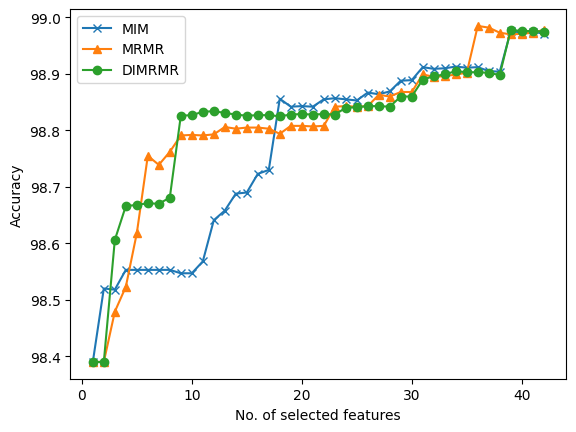

In [67]:
import matplotlib.pyplot as plt


xpoints = np.array(all_columns)
ypoints = np.array(mim_accuracy_results)

plt.plot(xpoints, ypoints, marker='x', label='MIM')

ypoints = np.array(mrmr_accuracy_results)
plt.plot(xpoints, ypoints, marker='^', label = 'MRMR')

ypoints = np.array(dimrmr_accuracy_results)
plt.plot(xpoints, ypoints, marker='o', label = 'DIMRMR')

plt.xlabel("No. of selected features")
plt.ylabel("Accuracy")
# plt.title("accuracy performance")

plt.legend()
plt.show()

In [4]:
len(mim_accuracy_results)

NameError: name 'mim_accuracy_results' is not defined

In [69]:
mim_accuracy_results = []
print('running on MIM')
for columns in all_columns:
    features = xk_mim[:columns]

    print(f'features using: {features}')
    curr_acc = selection_accurecy_KNN(features)
    print(curr_acc)
    mim_accuracy_results.append(curr_acc)
print(mim_accuracy_results)
mrmr_accuracy_results = []
print('running on MRMR')
for columns in all_columns:
    features = xk_mrmr[:columns]

    print(f'features using: {features}')
    curr_acc = selection_accurecy_KNN(features)
    print(curr_acc)
    mrmr_accuracy_results.append(curr_acc)
print(mrmr_accuracy_results)
dimrmr_accuracy_results = []
print('running on DIMRMR')
for columns in all_columns:
    features = xk_dimrmr[:columns]

    print(f'features using: {features}')
    curr_acc = selection_accurecy_KNN(features)
    print(curr_acc)
    dimrmr_accuracy_results.append(curr_acc)
print(dimrmr_accuracy_results)

running on MIM
features using: [32]
97.28998569856986
features using: [32, 5]
98.51998709870988
features using: [32, 5, 3]
98.51898709870986
features using: [32, 5, 3, 19]
98.55298749874987
features using: [32, 5, 3, 19, 13]


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt


xpoints = np.array(all_columns)
ypoints = np.array(mim_accuracy_results)

plt.plot(xpoints, ypoints, marker='x', label='MIM')

ypoints = np.array(mrmr_accuracy_results)
plt.plot(xpoints, ypoints, marker='^', label = 'MRMR')

ypoints = np.array(dimrmr_accuracy_results)
plt.plot(xpoints, ypoints, marker='o', label = 'DIMRMR')

plt.xlabel("No. of selected features")
plt.ylabel("Accuracy")
# plt.title("accuracy performance")

plt.legend()
plt.show()